<a href="https://colab.research.google.com/github/sasha110110/Realweb/blob/main/AUTOs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Классифицируем авто по типу кузова

In [ ]:
#всякие импорты 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [109]:
#files.upload() #для загрузки файлов

In [ ]:
import warnings #игнорируем всякие системные сообщения
warnings.filterwarnings("ignore")

In [ ]:
#считываем табличку в pandas
autos_df = pd.read_csv("/content/auto_complectations.xlsx - Sheet1.csv")

In [ ]:
# На всякий случай проверяем, есть ли нулевые значения. Их нет.
autos_df.isnull().sum()

brand                                                    0
model                                                    0
complect                                                 0
type_car                                                 0
seats                                                    0
doors                                                    0
Двигатель                                                0
Мощность                                                 0
Крутящий момент двигателя                                0
Коробка передач                                          0
Привод                                                   0
Разгон до сотни                                          0
Максимальная скорость                                    0
Расход топлива (л/100 км)\nгород / трасса / смешанный    0
Дорожный просвет                                         0
Габариты (длина × ширина × высота)                       0
Колёсная база                                           

In [ ]:
#посмотрим, как выглядит
autos_df.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,Привод,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),полный,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


In [ ]:
#всего 21 колонка и 1703 авто
autos_df.shape

(1703, 21)

In [ ]:
autos_df.dtypes # посмотрим на типы данных 
#Кроме сидений и колес, все типы - строчные объекты

brand                                                    object
model                                                    object
complect                                                 object
type_car                                                 object
seats                                                     int64
doors                                                     int64
Двигатель                                                object
Мощность                                                 object
Крутящий момент двигателя                                object
Коробка передач                                          object
Привод                                                   object
Разгон до сотни                                          object
Максимальная скорость                                    object
Расход топлива (л/100 км)\nгород / трасса / смешанный    object
Дорожный просвет                                         object
Габариты (длина × ширина × высота)      

In [ ]:
# напишем некотрые функции для очистки данных,
# в основном просто отбрасываем часть строки с единицами измерения - можно и substring.isdigit()
def clean(some_string):
  temp=some_string.split(" ")
  return temp[0]

In [ ]:
def clean_for_engine(some_string): #отдельно для двигателя
  temp=some_string.split(" ")
  t=temp[1].replace("(", "")
  return t

## Будем сохранять обработанные данные в новую табличку AUTOS

In [ ]:
AUTOS=autos_df[["brand",	"model",	"complect"]]  # начало просто переносим -марка, модель, комплектация

In [ ]:
autos_df["type_car"].unique()
# Видим, что типов авто много. По заданию нужно рассортировать только по 4 типам кузовов, поэтому остальные  
# авто просто не будем рассматривать - например, родстеры, кабриолеты, пикапы, вэны.

array(['Седан класса C', 'Хэтчбек класса B', 'Седан класса D',
       'Универсал повышенной проходимости класса D', 'Универсал класса D',
       'Купе класса D', 'Хэтчбек класса D', 'Седан класса E',
       'Универсал класса E', 'Хэтчбек класса E', 'Седан класса F',
       'Большой кроссовер', 'Компактный кроссовер',
       'Среднеразмерный кроссовер', 'Купе класса C', 'Спорткупе',
       'Кабриолет с мягкой крышей', 'Спорткупе класса D',
       'Спортседан класса E', 'Родстер', 'Большой внедорожник',
       'Седан класса B', 'Хэтчбек класса A', 'Кроссовер класса B', 'Вэн',
       'Горячий хэтчбек класса C', 'Внедорожник класса B',
       'Среднеразмерный внедорожник', 'Хэтчбек класса C',
       'Универсал класса C', 'Спортседан класса D', 'Купе класса E',
       'Пикап', 'Горячий седан класса C', 'Минивэн', 'Компактвэн',
       'Универсал повышенной проходимости класса E'], dtype=object)

In [ ]:
# Оставим только модели без уточнений классов (и крутости? 'Горячий хэтчбек класса C' )
# Спортседан - это, наверное, все-таки седан. Остальные типы авто пока заменим 0.
def my_types(some_string):
  types=['Седан'.lower(), "Спортседан".lower(), "Кроссовер".lower(), 
         "Хэтчбек".lower(), "Внедорожник".lower()]
  temp=some_string.split(" ")
  for i in temp:
    if i.lower() in types:
      return i.lower()
    return 0
  #return [i.lower() for i in temp else 0]


In [ ]:
AUTOS["type_car"]=autos_df["type_car"].apply(my_types)

In [ ]:
# проверим, что получилось
AUTOS["type_car"].unique()

array(['седан', 'хэтчбек', 0, 'спортседан', 'кроссовер', 'внедорожник'],
      dtype=object)

In [ ]:
# Через словарь оставим нужные типы -  Так проще совместить типы кузовов, 
#задав одинаковые значения. И чтобы потом при обучении закодировать их в one-hot, 
# так модели будет проще обучиться
types_indexes={"седан":1, "спортседан":1, "кроссовер":2, "хэтчбек":3, "внедорожник":4}

In [ ]:
AUTOS["type_car"] = AUTOS["type_car"].map(types_indexes)

In [ ]:
AUTOS[["seats", "doors"]]=autos_df[["seats", "doors"]]

In [ ]:
AUTOS["Двигатель"]=autos_df["Двигатель"].apply(clean_for_engine).astype("int")

In [ ]:
AUTOS['Мощность']=autos_df['Мощность'].apply(clean).astype("int")

In [ ]:
AUTOS['Крутящий момент двигателя']=autos_df['Крутящий момент двигателя'].apply(clean).astype("int")

In [ ]:
# посмотрим уикальные значения - и сохраним как катеориальный тип, с приводами поступим так же. 
autos_df['Коробка передач'].unique()

array(['роботизированная (7 ступеней)', 'автоматическая (8 ступеней)',
       'автоматическая (1 ступеней)', 'роботизированная (6 ступеней)',
       'механическая (6 ступеней)', 'автоматическая (6 ступеней)',
       'автоматическая (10 ступеней)', 'автоматическая (9 ступеней)',
       'механическая (5 ступеней)', 'автоматическая (4 ступеней)',
       'автоматическая (7 ступеней)', 'вариатор (0 ступеней)',
       'автоматическая (5 ступеней)', 'роботизированная (8 ступеней)',
       'автоматическая (0 ступеней)', 'роботизированная (9 ступеней)'],
      dtype=object)

In [ ]:
AUTOS['Коробка передач']=autos_df['Коробка передач'].astype("category")

In [ ]:
autos_df['Привод'].unique()

array(['передний', 'полный', 'задний'], dtype=object)

In [ ]:
AUTOS['Привод']=autos_df['Привод'].astype("category")

In [ ]:
AUTOS['Разгон до сотни']=autos_df['Разгон до сотни'].apply(clean)

In [ ]:
sorted(AUTOS['Разгон до сотни'].unique())

In [ ]:
#Оказалось, что есть нечисловые значения - "нет"- заменим их на среднее пока, сортируем - ищем по десяткам - так проще - 
# минимум - 3.2, максимум - 10.9

In [ ]:
to_insert=(3.2+10.9)/2

In [ ]:
AUTOS['Разгон до сотни']=AUTOS['Разгон до сотни'].replace(["нет"], to_insert)

In [ ]:
AUTOS['Разгон до сотни'].astype("float")

In [ ]:
AUTOS['Максимальная скорость']=autos_df['Максимальная скорость'].apply(clean).astype("int")

In [ ]:
#Расход топлива разбиваем на отдельные колонки, так же поступаем с габаритами 
AUTOS[['Расход город','Расход трасса','Расход смеш']] = autos_df['Расход топлива (л/100 км)\nгород / трасса / смешанный'].str.split('/ ', expand=True).values.astype("float")

In [ ]:
AUTOS['Дорожный просвет']=autos_df['Дорожный просвет'].apply(clean).astype("int")

In [ ]:
AUTOS[['L','W','H']] = autos_df['Габариты (длина × ширина × высота)'].str.split(' × ', expand=True).values.astype("int")

In [ ]:
AUTOS['Колёсная база']=autos_df['Колёсная база'].apply(clean).astype("int")

In [ ]:
AUTOS['Объём багажника']=autos_df['Объём багажника'].apply(clean).astype("int")

In [ ]:
AUTOS['Объём багажника максимальный']=autos_df['Объём багажника максимальный'].apply(clean).astype("int")

In [ ]:
AUTOS[ 'Объём топливного бака']=autos_df[ 'Объём топливного бака'].apply(clean).astype("int")

In [ ]:
AUTOS[ 'Масса автомобиля']=autos_df['Масса автомобиля'].apply(clean).astype("int")

In [ ]:
# И наконец, удалим типы кузовов, которые нам не нужны по заданию, они быди проставлены 0
AUTOS = AUTOS[AUTOS.type_car.notnull()]

In [ ]:
AUTOS.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,Привод,Разгон до сотни,Максимальная скорость,Расход город,Расход трасса,Расход смеш,Дорожный просвет,L,W,H,Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,1.0,5,4,1395,150,250,роботизированная (7 ступеней),передний,8.2,224,5.9,4.1,4.8,165,4458,1796,1416,2637,425,880,50,1320
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,1.0,5,4,1395,150,250,роботизированная (7 ступеней),передний,8.2,224,5.9,4.1,4.8,165,4458,1796,1416,2637,425,880,50,1320
2,Audi,A3 Sedan,2.0 TFSI 7AMT,1.0,5,4,1984,190,320,роботизированная (7 ступеней),передний,6.8,250,7.2,4.7,5.6,165,4458,1796,1416,2637,425,880,50,1395
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,1.0,5,4,1984,190,320,роботизированная (7 ступеней),полный,6.2,242,7.2,4.8,5.7,165,4458,1796,1416,2637,390,845,55,1465
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,1.0,5,4,1984,190,320,роботизированная (7 ступеней),передний,6.8,242,7.2,4.7,5.6,165,4458,1796,1416,2637,425,880,50,1395


In [ ]:
AUTOS.shape

(577, 25)

## Вот новая табличка, сохраним! 

In [ ]:
AUTOS.to_csv("/content/AUTOS_X.csv")
#так-то лучше! 

## Теперь можно посмотреть на статистику, графики, корреляции. 

In [ ]:
AUTOS["type_car"].value_counts()

1.0    413
3.0    125
2.0     24
4.0     15
Name: type_car, dtype: int64

Классы очень несбалансированы
 <br> Посмотрим на статистику, и для наглядности выведем ее на графиках - сначала по всем данным, а потом группируя по типам кузовов

In [ ]:
AUTOS.iloc[:, 6:].describe()

,Двигатель,Мощность,Крутящий момент двигателя,Максимальная скорость,Расход город,Расход трасса,Расход смеш,Дорожный просвет,L,W,H,Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,2108.464471,200.760832,307.885615,214.384749,8.261005,4.995321,6.970017,147.005199,4684.499133,1826.840555,1482.745234,2788.043328,459.400347,732.474870,60.086655,1538.512998
std,758.753871,104.835859,166.141028,33.746208,3.690174,2.101685,1.853399,43.006479,354.799548,81.457293,83.862378,190.579908,99.533500,422.179357,12.116310,323.648022
min,0.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3595.000000,1595.000000,1386.000000,2250.000000,0.000000,0.000000,0.000000,885.000000
25%,1598.000000,123.000000,155.000000,189.000000,7.200000,4.700000,6.000000,140.000000,4420.000000,1775.000000,1447.000000,2602.000000,420.000000,478.000000,50.000000,1235.000000
50%,1984.000000,180.000000,250.000000,210.000000,8.500000,5.400000,6.800000,155.000000,4709.000000,1840.000000,1467.000000,2820.000000,480.000000,510.000000,60.000000,1484.000000
75%,2488.000000,249.000000,400.000000,241.000000,10.100000,6.000000,7.700000,163.000000,4936.000000,1886.000000,1488.000000,2926.000000,520.000000,1075.000000,66.000000,1760.000000
max,6592.000000,639.000000,900.000000,315.000000,18.400000,9.600000,12.800000,291.000000,5495.000000,1998.000000,1974.000000,3450.000000,625.000000,1800.000000,90.000000,2351.000000


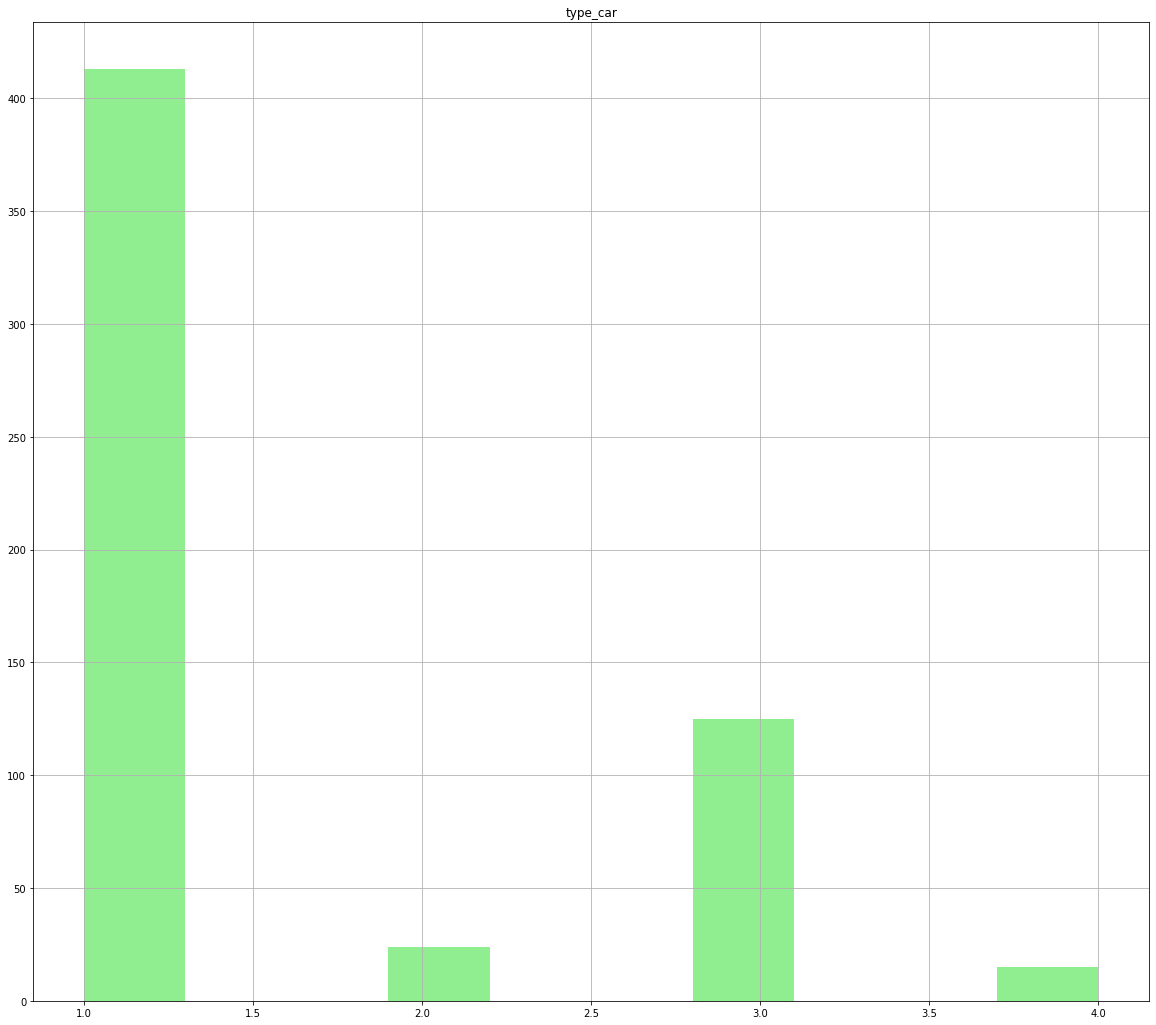

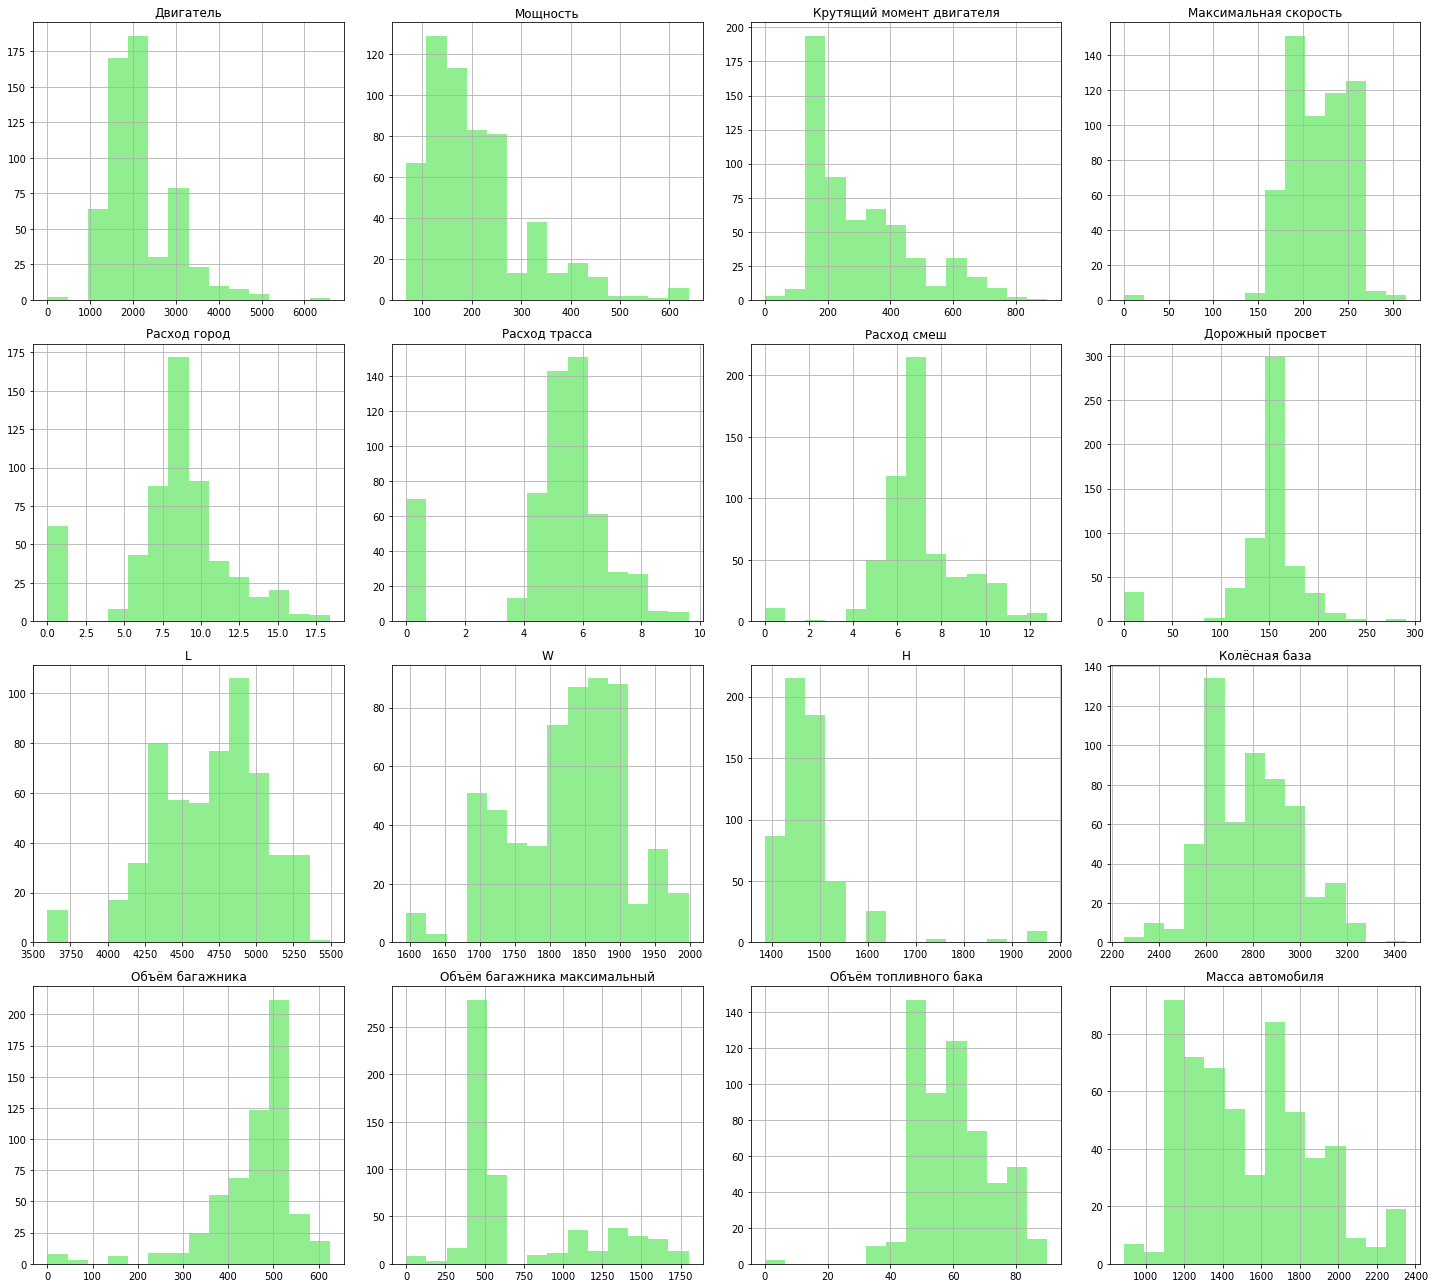

In [ ]:
# посмотрим на распределение значений
AUTOS[['type_car']].hist(figsize=(20,18),bins=10,color='lightgreen')
AUTOS.iloc[:, 6:].hist(figsize=(20,18),bins=14,color='lightgreen')
plt.tight_layout()
plt.show()

Получается, в общем нет нормальных распределений, многие бимодальные (что, кстати не связано с тем, что датасет несбалансированный, внутри кластеров также наблюдаются два пика (графики чуть ниже)), или сдвинуты влево или вправо. 

Распределение категориальных переменных также довольно наглядно видно в таких табличках. 

In [ ]:
AUTOS.groupby('type_car')["Коробка передач"].value_counts()

type_car  Коробка передач              
1.0       автоматическая (8 ступеней)      150
          автоматическая (6 ступеней)       94
          роботизированная (7 ступеней)     59
          механическая (5 ступеней)         45
          автоматическая (9 ступеней)       21
          механическая (6 ступеней)         16
          автоматическая (10 ступеней)      11
          вариатор (0 ступеней)              9
          автоматическая (4 ступеней)        4
          автоматическая (7 ступеней)        4
2.0       автоматическая (6 ступеней)       17
          механическая (5 ступеней)          4
          механическая (6 ступеней)          2
          роботизированная (7 ступеней)      1
3.0       роботизированная (7 ступеней)     35
          автоматическая (8 ступеней)       26
          автоматическая (6 ступеней)       18
          механическая (5 ступеней)         14
          механическая (6 ступеней)         13
          автоматическая (4 ступеней)       12
          роботизиро

In [ ]:
AUTOS.groupby('type_car')["Привод"].value_counts()

type_car  Привод  
1.0       передний    233
          полный      153
          задний       27
2.0       передний     24
3.0       передний     83
          полный       37
          задний        5
4.0       полный       15
Name: Привод, dtype: int64

In [ ]:
AUTOS.groupby('type_car')["seats"].value_counts()

type_car  seats
1.0       5        375
          4         38
2.0       5         24
3.0       5        125
4.0       5          9
          4          6
Name: seats, dtype: int64

In [ ]:
AUTOS.groupby('type_car')["doors"].value_counts()

type_car  doors
1.0       4        356
          5         57
2.0       5         24
3.0       5        123
          4          2
4.0       6          9
          2          3
          3          3
Name: doors, dtype: int64

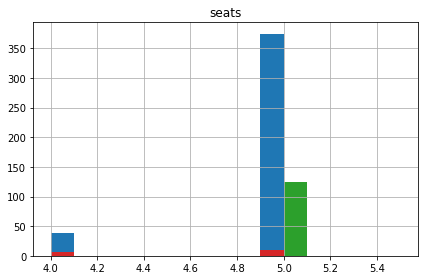

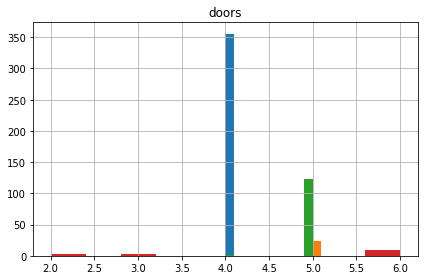

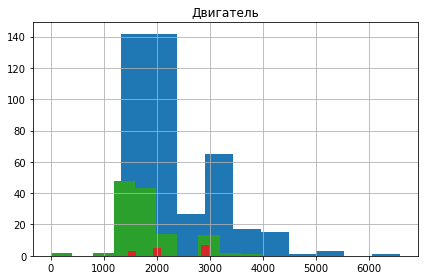

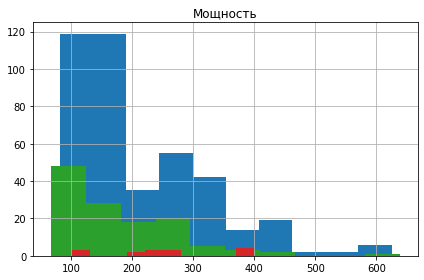

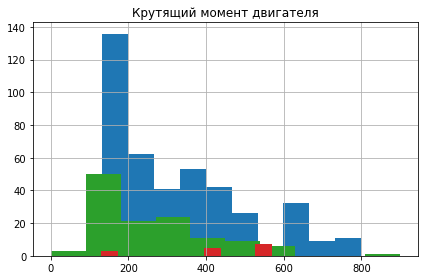

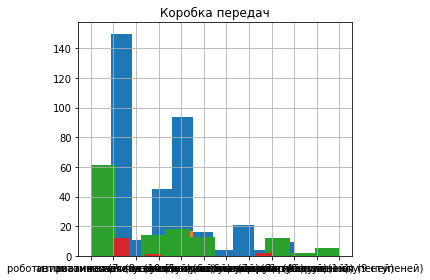

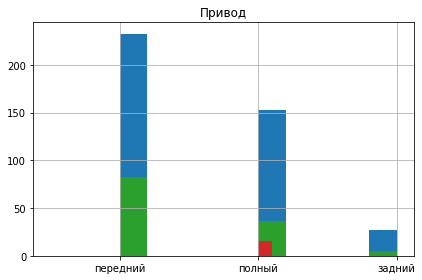

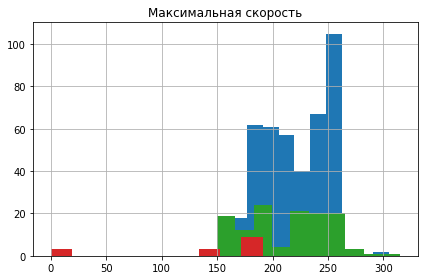

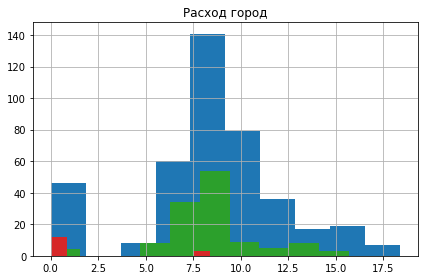

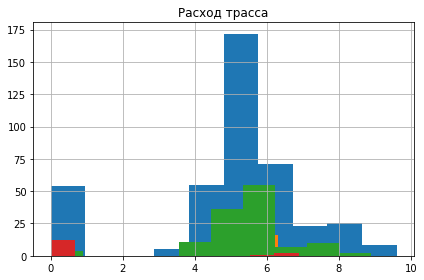

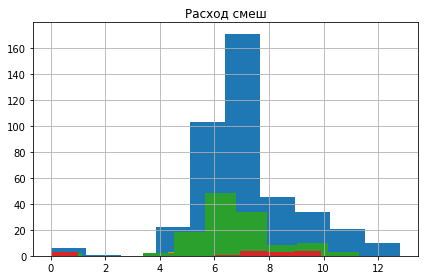

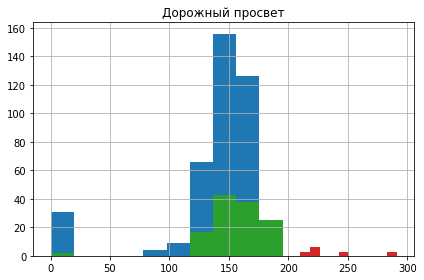

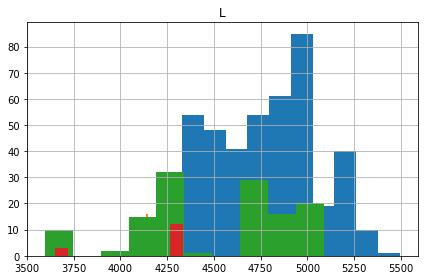

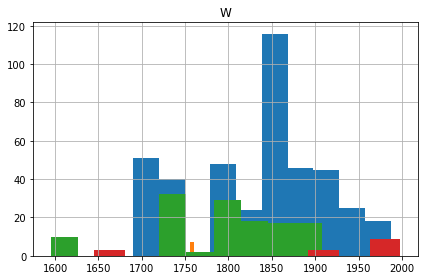

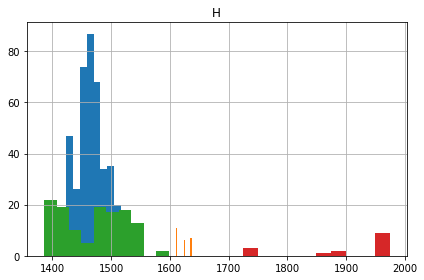

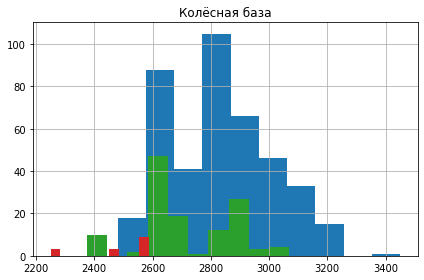

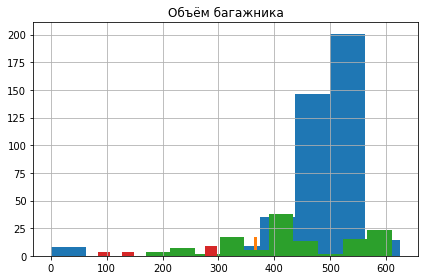

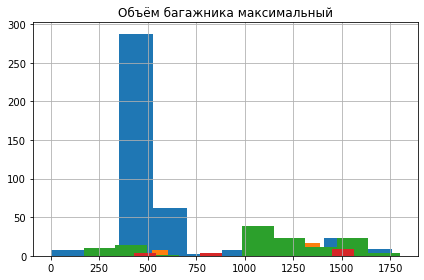

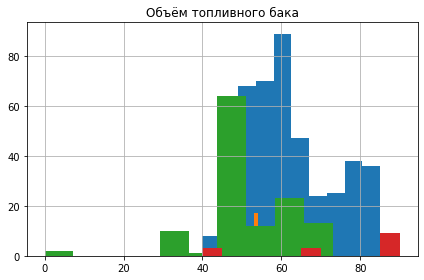

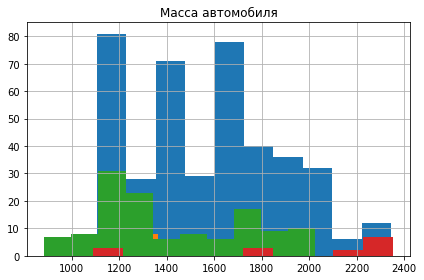

In [ ]:
for column in AUTOS.columns[4:]:
  try:
      AUTOS.groupby('type_car')[column].hist()
      plt.title(column)
      plt.tight_layout()
      plt.show()
  except TypeError:
    continue



Получается, что у некоторых типов автомобилей широкий набор характеристик и какие-то характеристики встречаются чаще, а у некоторых типов - довольно узкий набор характеристик, а некоторые характеристики могут и вовсе не встречаться. 

Посмотрим на кореляционную матрицу, начиная с двигателей.
<br> corr() - рассчитывает корреляцию Пирсона между всеми парами переменных. 

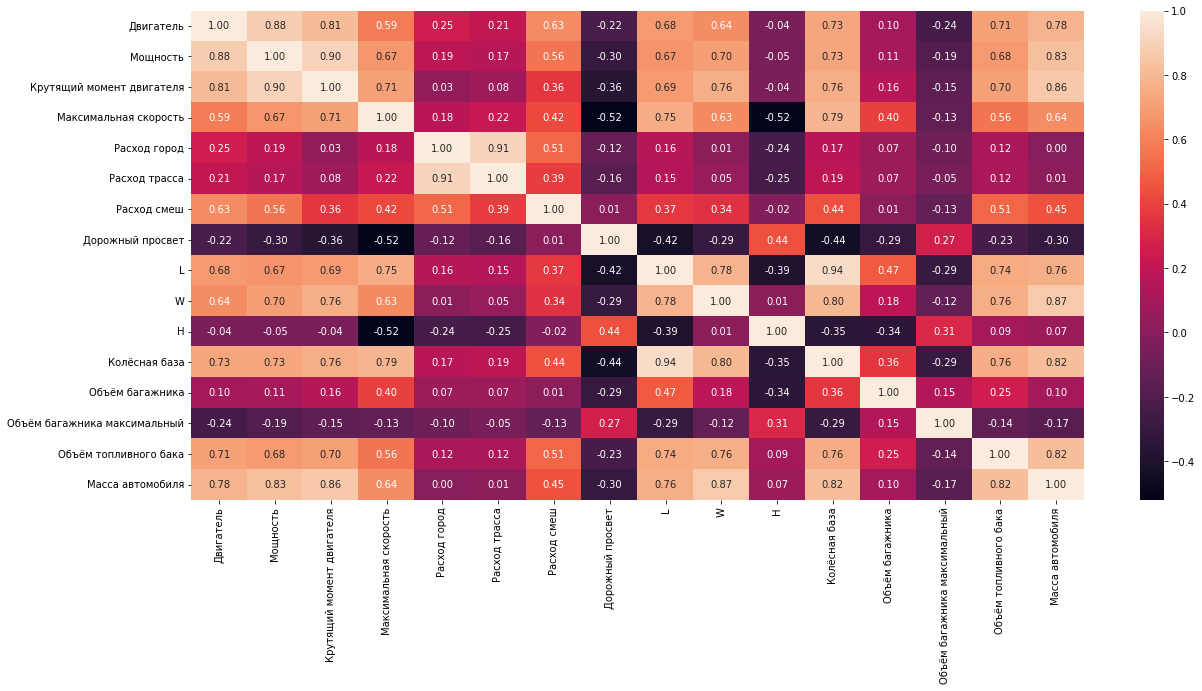

In [ ]:
import seaborn as sns
corr = AUTOS[AUTOS.columns[6:]].corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

Значения корреляции >0.7 (<-0.7) статаются сильными корреляциями. 
<br> Нет смысла добавлять обе коррелирующие переменные в модель - они не добавят дополнительной информации, но и могут ухудшить модель.  

In [ ]:
# Пройдем по строкам и столбцам кореляционной матрицы и выпишем сильно коррелирующие переменные
def find_high_corr(corr_matrix):
  high_corr=[]
  for i in range(len(corr_matrix.columns)-1):
    for j in range(len(corr_matrix.index)-1):
      if abs(corr_matrix.values[i][j])>0.7 and corr_matrix.columns[i]!=corr_matrix.index[j]:
        high_corr.append([corr_matrix.columns[i], corr_matrix.index[j]])
  sorted_corr=[sorted(i) for i in high_corr] #отсортируем, чтобы на первом месте были одинаковые значения
  return sorted_corr

In [ ]:
correlations=find_high_corr(corr)
correlations

[['Двигатель', 'Мощность'],
 ['Двигатель', 'Крутящий момент двигателя'],
 ['Двигатель', 'Колёсная база'],
 ['Двигатель', 'Объём топливного бака'],
 ['Двигатель', 'Мощность'],
 ['Крутящий момент двигателя', 'Мощность'],
 ['W', 'Мощность'],
 ['Колёсная база', 'Мощность'],
 ['Двигатель', 'Крутящий момент двигателя'],
 ['Крутящий момент двигателя', 'Мощность'],
 ['Крутящий момент двигателя', 'Максимальная скорость'],
 ['W', 'Крутящий момент двигателя'],
 ['Колёсная база', 'Крутящий момент двигателя'],
 ['Крутящий момент двигателя', 'Объём топливного бака'],
 ['Крутящий момент двигателя', 'Максимальная скорость'],
 ['L', 'Максимальная скорость'],
 ['Колёсная база', 'Максимальная скорость'],
 ['Расход город', 'Расход трасса'],
 ['Расход город', 'Расход трасса'],
 ['L', 'Максимальная скорость'],
 ['L', 'W'],
 ['L', 'Колёсная база'],
 ['L', 'Объём топливного бака'],
 ['W', 'Мощность'],
 ['W', 'Крутящий момент двигателя'],
 ['L', 'W'],
 ['W', 'Колёсная база'],
 ['W', 'Объём топливного бака'],
 

In [ ]:
# Переменные, которые оставим. 
k=[item[0] for item in correlations]
v=[item[1] for item in correlations]
  
to_consider=set([x for x in k if x not in v])
to_consider

{'L', 'Двигатель', 'Расход город'}

In [ ]:
# Тогда не будем рассматривать следующие переменные
not_to_consider=list(set(sum(correlations, []))-to_consider)

In [81]:
#Стоит также сразу исключить переменные,  - 
#которые почти одинаковы у всех (двери, сиденья, привод),
#тогда в общей сложности остаются 
left=[x for x in AUTOS.columns[6:] if x not in not_to_consider+["doors", "seats", "Привод"]]
left

['Двигатель',
 'Коробка передач',
 'Разгон до сотни',
 'Расход город',
 'Расход смеш',
 'Дорожный просвет',
 'L',
 'H',
 'Объём багажника',
 'Объём багажника максимальный',
 'Масса автомобиля']

In [82]:
# Раз осталась коробка передач, ее нужн закодировать - она у нас до сих пор категориальная
from sklearn import preprocessing

In [84]:
le = preprocessing.LabelEncoder()
AUTOS['Коробка передач']=le.fit_transform(AUTOS['Коробка передач'])

## Decision Tree
Чтобы разбить наши данные по типам кузовов, хорошо подойдет дерево решений. Это алгоритм обучения с учителем, решающий задачи регрессии и классификации. У каждого типа кузова есть свой характерный набор дискретных переменных. Дерево решений будет разбивать нашу выборку на все меньшие подвыборки, уменьшая с каждым узлом информацонную "загрязненность" (неоднозначность принадлежности какого-го то авто к какому-то типу, судя по каким-то переменным). По уолчанию для разбиения данных выставлен индекс Джини. Так и оставим

In [99]:
# импортируем библиотеки 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [86]:
X=AUTOS[left]

In [87]:
X.shape

(577, 11)

In [ ]:
# целевые метки классов в формате one-hot 
y=(pd.get_dummies(AUTOS["type_car"])).values

In [ ]:
y

In [89]:
# оценивать качество будем на отложенной выборке (20% от набора данных, 
# stratify=y гарантирует, что в отложенную выборку попадут все классы)
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [90]:
# Поскольку данные не сбалансированы, добавим class_weight="balanced", чтобы алгоритм повысил веса маленьким классам
# Остальные гипермараметры можно вполне сохранить по умолчанию
# Кстати, переменные не нужно стандартизировать, ведь при разбиении каждая рассматривается по отдельности
decision = DecisionTreeClassifier(class_weight="balanced")

decision = decision.fit(x_train,y_train)

y_pred = decision.predict(x_test)

In [92]:
# В качестве критерия качества возьмем Accuracy - доля правильно угаданных меток класса
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [94]:
# Посмотрим на переменные, которые оказались наиболее полезными для предсказания метки класса.  
importance=decision.feature_importances_

In [97]:
# Распечатаем их
for el, score in zip(list(AUTOS[left].columns), sorted(list(importance), reverse=True)):
  print(el, "-->", score)


Двигатель --> 0.8377254150172926
Коробка передач --> 0.12030112240552177
Разгон до сотни --> 0.020573946976116437
Расход город --> 0.009914026990509348
Расход смеш --> 0.005984788308296729
Дорожный просвет --> 0.003434073167517444
L --> 0.0020666271347456085
H --> 0.0
Объём багажника --> 0.0
Объём багажника максимальный --> 0.0
Масса автомобиля --> 0.0


Оказалось, двигатель определяет почти все. 

[Text(245.52, 206.56799999999998, 'X[7] <= 1681.0\ngini = 0.358\nsamples = 461\nvalue = [[376.566, 39.401]\n[283.026, 132.941]\n[307.388, 108.578]\n[280.921, 135.046]]'),
 Text(223.2, 184.824, 'X[7] <= 1604.0\ngini = 0.303\nsamples = 449\nvalue = [[241.519, 39.401]\n[147.98, 132.941]\n[172.342, 108.578]\n[280.921, 0.0]]'),
 Text(200.88, 163.07999999999998, 'X[9] <= 995.0\ngini = 0.195\nsamples = 430\nvalue = [[108.578, 39.401]\n[147.98, 0.0]\n[39.401, 108.578]\n[147.98, 0.0]]'),
 Text(111.6, 141.336, 'X[9] <= 467.0\ngini = 0.235\nsamples = 320\nvalue = [[21.716, 35.819]\n[57.535, 0.0]\n[35.819, 21.716]\n[57.535, 0.0]]'),
 Text(44.64, 119.592, 'X[7] <= 1393.0\ngini = 0.216\nsamples = 99\nvalue = [[20.63, 9.552]\n[30.182, 0.0]\n[9.552, 20.63]\n[30.182, 0.0]]'),
 Text(22.32, 97.848, 'gini = 0.0\nsamples = 10\nvalue = [[10.858, 0.0]\n[10.858, 0.0]\n[0.0, 10.858]\n[10.858, 0.0]]'),
 Text(66.96000000000001, 97.848, 'X[10] <= 1157.0\ngini = 0.25\nsamples = 89\nvalue = [[9.772, 9.552]\n[19.324

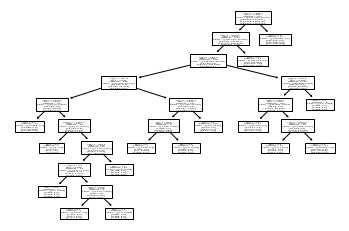

In [101]:
# Дерево можно визуализировать
tree.plot_tree(decision)

In [106]:
# Случайный лес (взвешенное решение многих деревьеа решений дает 
# почти такую же точность, но очевидно, оно тяжелее)
# Возьмем 20 деревьев решений, остальные параметры - по умолчанию
forest=RandomForestClassifier(class_weight="balanced", n_estimators=20)

In [107]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
y_pred=forest.predict(x_test)

In [105]:
print(accuracy_score(y_test, y_pred))

0.9827586206896551
